<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/%5BNH%5D_Python_for_Topic_Modelling_(ALL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# import numpy as np
import re
import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

# import string
import matplotlib.pyplot as plt
import gensim
# import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
# from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

In [ ]:
from google.colab import files
files.upload()

In [19]:
df_news = pd.read_csv("a-machado-(CLEAN)-Revisado3-(solo libros)-nuevo.csv")

In [ ]:
df_news.drop('Unnamed: 0', axis=1, inplace=True)
df_news.drop('metaTL', axis=1, inplace=True)
df_news.drop('fragmento', axis=1, inplace=True)
df_news.drop('destinatario', axis=1, inplace=True)
#df_news.drop('Unnamed: 10', axis=1, inplace=True)
#df_news.drop('Unnamed: 11', axis=1, inplace=True)
#df_news.drop('Unnamed: 12', axis=1, inplace=True)
#df_news.drop('Unnamed: 13', axis=1, inplace=True)
#df_news.drop('Unnamed: 14', axis=1, inplace=True)
#df_news.drop('Unnamed: 15', axis=1, inplace=True)
#df_news.drop('Unnamed: 16', axis=1, inplace=True)

print(df_news)

불용어 리스트

In [20]:
black_list = [#불용어 처리 방법#3m [HY: 직접 만들기!]
                                  "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z", # 개별 알파벳(alfabeto) 
                                       
                                 "al", "del","de","en", "hacia", "por", "para", "entre",'sobre','según', #전치사(preposiciones)
                                 "con","comigo","contigo", "consigo", "sin",

                                 'cual', 'cuál', 'cuales', 'cuáles', 'cualquier', 'cualquiera', 'cualquieras', #관계사(relativos) & 의문사(interrogativos) (2)
                                 'cuan', 'cuán', 'cuando', 'cuándo', 'cuanta','cuánta', 'cuantas', 'cuántas', 'cuanto', 'cuánto', 'cuantos', 'cuántos',   #관계사(relativos) & 의문사(interrogativos) (1)
                                 'donde', 'dónde', 'adonde', 'adónde','como', 'cómo',                                  #관계사(relativos) & 의문사(interrogativos) (3)
                                 'que', 'qué', 'quien', 'quién', 'quienes', 'quiénes','quienesquiera', 'quienquiera', #관계사(relativos) & 의문사(interrogativos) (4)
                                 'cuyo', 'cuya','cuyos','cuyas', #관계사(relativos) & 의문사(interrogativos) (4)   

                                 'el', 'la', 'las', 'le', 'les', 'lo', 'los', 'un', 'una', 'unas', 'uno', 'unos', #관사(articulos)
                                 'yo', 'me', 'mi', 'mí', 'mia', 'mía', 'mias', 'mías','mio','mío', 'mios', 'míos', 'mis', #대명사(prombres)-1S
                                 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', #대명사(prombres)-1P
                                 'vosotras', 'vosotros', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'os', #대명사(prombres)-2P
                                 'él', 'ella', 'ellas', 'ello', 'ellos', #대명사(prombres)-3S (1)
                                 'ud', 'uds', 'usted','ustedes', 'vd', 'vds', 'se', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', #대명사(prombres)-3S (2)
                                 'te', 'ti', 'tí', 'tu', 'tú', 'tus', 'tuya', 'tuyas', 'tuyo', 'tuyos', #대명사(prombres)-2S

                                 #'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos', 'esas','aquel', 'aquella', 'aquellos', 'aquellas', #지시사(demostrativos)

                                 'era', 'erais', 'eramos', 'éramos', 'eran', 'eras',  #SER 동사활용형(1)
                                 'eres', 'es', 'sea', 'seáis', 'seamos', 'sean', 'seas','sois', 'somos','son', 'soy', #SER 동사활용형(2)
                                 'fue', 'fué', 'fui', 'fuí', 'fuimos', 'fuiste', 'fuisteis', #SER 동사활용형(3)
                                 'fuera', 'fuerais', 'fuéramos', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuésemos','fuesen', 'fueses', #SER 동사활용형(4)
                                 'será', 'serán', 'serás', 'seré', 'seréis', 'seremos', #SER 동사활용형(5)
                                 'sería', 'seríais', 'seríamos', 'serían', 'serías', #SER 동사활용형(6)
                                 'sido', 'siendo', #SER 동사활용형(7)

                                 'estar', 'está', 'estais', 'estáis', 'estamos', 'estan', 'están','estás', 'estoy',  #ESTAR 동사활용형(1)
                                 'estaba', 'estabais', 'estábamos', 'estaban', 'estabas', #ESTAR 동사활용형(2)
                                 'estada', 'estadas', 'estando', 'estad', #ESTAR 동사활용형(3)
                                 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaremos', #ESTAR 동사활용형(4)
                                 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', #ESTAR 동사활용형(5)
                                 'esté', 'estéis', 'estemos', 'estén', 'estés', #ESTAR 동사활용형(6) 
                                 'estuve', 'estuviera', 'estuvierais', 'estuviéramos', 'estuvieran', 'estuvieras', 'estuvieron', #ESTAR 동사활용형(7)
                                 'estuviese', 'estuvieseis', 'estuviésemos', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuvo',  #ESTAR 동사활용형(8)

                                 'haber', 'ha', 'habéis', 'han', 'has', 'hay', 'he', 'hemos',  #HABER 동사활용형(1)
                                 'habia', 'había', 'habíais', 'habíamos', 'habían', 'habías',  #HABER 동사활용형(2)
                                 'habida', 'habidas', 'habido', 'habidos', 'habiendo',         #HABER 동사활용형(3)
                                 'habrá', 'habrán', 'habrás', 'habré', 'habréis', 'habremos',  #HABER 동사활용형(4)
                                 'habría', 'habríais', 'habríamos', 'habrían', 'habrías',      #HABER 동사활용형(5)
                                 'haya', 'hayáis', 'hayamos', 'hayan', 'hayas',                #HABER 동사활용형(6)
                                 'hube', 'hubimos', 'hubiste', 'hubisteis', 'hubo',            #HABER 동사활용형(7)
                                 'hubiera', 'hubierais', 'hubiéramos', 'hubieran', 'hubieras', 'hubieron',  #HABER 동사활용형(8) 
                                 'hubiese', 'hubieseis', 'hubiésemos', 'hubiesen', 'hubieses', #HABER 동사활용형(9) 

                                 'ni','no','jamás','nunca','nada','ningún','ninguna','ninguno', #부정어(negativos)
                                 'pero','mas', 'aunque','pues','porque','si','sí', #접속사(conjunciones)
                                 'algo','algún','alguna','algunas','alguno','algunos', #부정어(indefinidos)
                                 'embargo',                                     #기타(etc)                                                                   ))         
  
                                   "LBR",
                                   "ttl",
                                   "mtl",
                                   "ftl",
                                   "=","===============================================",
                                   "01","02","03","04","05","06","07","08","09"]

#**품사별 분류**

In [21]:
def lemmatization(texts):
    texts_out = [ token.text for token in nlp(texts) if token.text not in black_list and len(token.text)>2]
    return texts_out

Create the cleaner function to clean the spanish text, remove non alpha numeric characters, remove duplicate, remove spanish accutes, remove digits.

In [22]:
bigram = gensim.models.Phrases(df_news.texto.to_list())

In [23]:
stop = set(stopwords.words('spanish'))
additional_stopwords=set(black_list)
stopwords = stop.union(additional_stopwords)

In [24]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'ee.uu', 'eeuu', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  bigram_list = bigram[list_word_clean]
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

We are using Spacy For lemmatize spanish words.

In [ ]:
!python -m spacy download es_core_news_sm

In [25]:
import spacy 
nlp = spacy.load("es_core_news_sm")

Now let's test the cleaner function:

Let's clean all the text

In [26]:
df_news['texto2'] = df_news['texto']
df_news['texto'] = df_news['texto'].apply(cleaner)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Now we need to build the corpus and the dictionary that gensim need to work, to do that we need to pass a list of list of tokens.

In [27]:
dictionary = Dictionary(df_news['texto'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in df_news['texto'].to_list()]

In [ ]:
dictionary.doc2bow(df_news['texto'].to_list()[0])

In [ ]:
corpus

##**Model#1: Hierarchical Dirichlet process Model**

In [44]:
import time
time.clock = time.time

In [45]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary, random_state= 30)

and the topics of this model:

In [46]:
def display_topics(model, model_type="lda"):
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

In [47]:
# hdpmodel.show_topics() 

display_topics(hdpmodel, model_type="hdp")

Topic 0:
ruina  tregua  ascua  presente  llano  quedando  verdadero  monta  carne  verdugo 

Topic 1:
salon  madres  ausente  alta  respondi  ofrece  clamor  coche  mudas  verdades 

Topic 2:
alcores  sierra  rueda  miras  ruise  grandmontagne  espuma  mirtos  mayor  ilumina 

Topic 3:
blasfemo  barca  polvorientos  verso  malandanza  mustio  luna  helado  ambas  corren 

Topic 4:
claro  casi  historias  hondo  parques  riel  cara  vicio  salamanca  diosa 

Topic 5:
tacha  huella  empu  ciruelos  vengadora  propio  hilera  repiquetean  heces  torreones 

Topic 6:
aborrascado  alzo  hamlet  valles  verdaderas  abrio  salduero  ocaso  lejanos  bien 

Topic 7:
hordas  noches  tajamares  latir  platea  ventanas  mercaderes  viaje  cuento  ayer 

Topic 8:
maduro  grotesca  pobre  tosca  vas  importa  prendida  lienzos  llega  siembra 

Topic 9:
claro  huella  tic  mason  anoche  aspero  copia  claros  pierde  moreno 

Topic 10:
lejanos  leyendas  oido  almendro  barrancas  conquista  sayal 

as we could see there are 20 topics, however is kind of dificult to interpret or follow, so we decide to move to another model.

##**Model#2: LSI Model**

In [48]:
def evaluate_graph(dictionary, corpus, texts, limit, model):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

In [49]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [50]:
display_topics(lsimodel)  # Showing the topics

Topic 0:
tic agua mar sue tierra tarde sol corazon dia sombra 

Topic 1:
tic luna sombra tierra sue tiempo agua tarde amor vida 

Topic 2:
luna sombra ora tierra noche castilla tic mar abril espa 

Topic 3:
tarde fuente verano luna agua espa pena clara hermano castilla 

Topic 4:
espa tierra campo guerra paz sol alma ana bajo hoy 

Topic 5:
claro mar tierra agua castilla dos bajo casa amor sue 

Topic 6:
corazon mar claro guerra castilla tierra espa paz amor dios 

Topic 7:
claro castilla mar corazon tiempo tierra tan siempre glu camino 

Topic 8:
claro dios guerra paz castilla agua ana ayer fuente alma 

Topic 9:
mar tiempo castilla poeta dios corazon campo alma viejo espa 



It seen that with 10 topics there is some themes with keywords related to: trump, venezuela, police, electiones, terrorism; still is a little difficult to gt some insight, because of this we are trying to select the best number of topics by iterate over a range of values and looking the coherence.

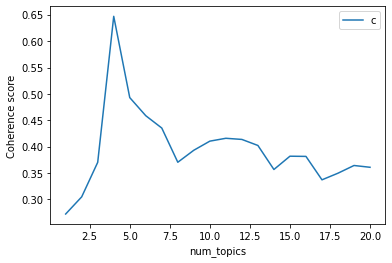

In [51]:
lmlist_lsi, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lsi") #HY: text -> texto

According to the coherence the best number of topics are between 3-7, however you must select the topics using both the coherence and visual inspection.

In [52]:
display_topics(lmlist_lsi[8])

Topic 0:
tic agua mar sue tierra tarde sol corazon dia sombra 

Topic 1:
tic luna sombra tierra sue tiempo agua tarde amor vida 

Topic 2:
luna sombra ora tierra noche castilla tic mar abril espa 

Topic 3:
tarde fuente verano luna agua espa pena clara hermano castilla 

Topic 4:
espa tierra campo guerra paz sol alma ana hoy bajo 

Topic 5:
claro mar tierra agua castilla dos bajo casa amor sue 

Topic 6:
corazon mar claro guerra castilla tierra espa paz amor dios 

Topic 7:
claro castilla mar corazon tiempo tierra tan siempre glu camino 

Topic 8:
claro dios guerra paz castilla agua ana ayer fuente alma 



Now, Let's try another model!

##**Model#3: Latent Dirichlet Allocation Model**

In [53]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [54]:
display_topics(ldamodel)

Topic 0:
mar tierra bajo tarde campo sue sol espa corazon ojos 

Topic 1:
tierra mano sol dios ana ojos noche tarde azul luna 

Topic 2:
luna mar sue agua mano espa tarde hoy noche sombra 

Topic 3:
tierra sue verde sierra agua huerto mano mar castilla alma 

Topic 4:
claro tierra sol campo viento tarde agua sue fuente dos 

Topic 5:
sombra sue tarde sol dia tierra bajo corazon luz ojos 

Topic 6:
amor corazon tierra mar sue espa hoy ojos dia luz 

Topic 7:
tarde sol agua tierra campo alma sue piedra mejor plaza 

Topic 8:
mar corazon sue agua alma sol tarde dia sombra tierra 

Topic 9:
amor agua tierra capitan corazon luna sue ana olvido mano 



Find out the optimal number of topics for the LDA model based on the coherence metric:

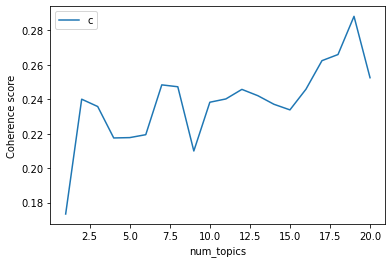

In [55]:
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['texto'].to_list(), limit=21, model= "lda")

For this model it seems that 9 or 18, again we must to check the keywords too.

##**Comparing the Model Coherence of the Best Models**

In [56]:
ldamodel = lmlist[5]
lsimodel = lmlist_lsi[2]

lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [57]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() #HY: text -> texto

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() #HY: text -> texto

lda_coherence = CoherenceModel(topics=ldatopics, texts=df_news['texto'].to_list(), dictionary=dictionary, window_size=10).get_coherence() #HY: text -> texto

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

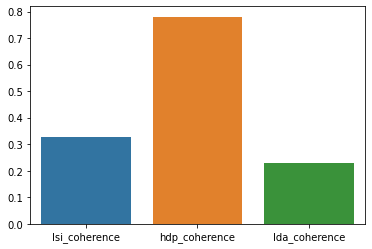

In [58]:
import seaborn as sns

coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)


We can see that the **LdaModel** model **with 8 topics** has the higher value of
coherence ?????? **[HY: 실제 결과에 따라 수정 필요]**

Examine the keyword to get the topics of the best model

In [59]:
display_topics(ldamodel)

Topic 0:
sue tierra sombra dia alma amor ojos dios sol tarde 

Topic 1:
mar corazon tierra ojos sue bajo agua espa sol ana 

Topic 2:
claro tierra tarde amor viento mano sol agua hoy piedra 

Topic 3:
agua mar tierra sue sol tarde luz corazon amor dia 

Topic 4:
campo sol luna camino amor bajo dia tarde dios mar 

Topic 5:
corazon fuente tierra sue agua tarde espa luna noche mar 



Let´s check the keyword when we selecting another number of topics (14)

In [ ]:
ldamodel_16 =lmlist[16]

In [ ]:
display_topics(ldamodel_16)

##**Classifiying all documents**

*  now that we have been select the best model and topics number, is time to assign a topic to each document, means cluster according to the topics



In [60]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df_news['texto'].to_list()) #HY: text -> texto
 


In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(500)

We selected the ldamodel with 12 topics and asigned a dominant topic to each document, now let map each topic with a label 

first let's create the dictionary

In [ ]:
label_dicc = {0:'TEMA1', 1:'TEMA2', 2:'TEMA3', 3: 'TEMA4', 4:'TEMA5', 5:'TEMA6', 6:'TEMA7', 
              7:'TEMA8', 8:'TEMA9', 9: 'TEMA10', 10:'TEMA11', 11:'TEMA12'}   #HY: 다시 설정 필요!!

In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype('int64')

In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].map(label_dicc)
#df_dominant_topic.head(10)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,TEMA5,0.9917,"sue, mano, tarde, tierra, sol, corazon, agua, ...","[sala, familiar, sombria, querido, hermano, su..."
1,1,TEMA5,0.9853,"sue, mano, tarde, tierra, sol, corazon, agua, ...","[andado, caminos, abierto, muchas, veredas, na..."
2,2,TEMA6,0.9678,"tarde, agua, alma, espa, tierra, sombra, alto,...","[plaza, naranjos, encendidos, frutas, redondas..."
3,3,TEMA3,0.3996,"tarde, tierra, viento, corazon, piedra, camino...","[tierra, dieron, tarde, horrible, mes, julio, ..."
4,4,TEMA3,0.9814,"tarde, tierra, viento, corazon, piedra, camino...","[tarde, parda, fria, invierno, colegiales, est..."
...,...,...,...,...,...
561,561,TEMA4,0.9635,"tierra, hoy, agua, sue, sol, dios, dia, sombra...","[angel, sabiasu, secreto, salio, martin, paso,..."
562,562,TEMA4,0.9711,"tierra, hoy, agua, sue, sol, dios, dia, sombra...","[vio, musa, esquivade, pie, junto, lecho, enlu..."
563,563,TEMA4,0.9559,"tierra, hoy, agua, sue, sol, dios, dia, sombra...","[vivi, dormi, creado, penso, martin, turbia, p..."
564,564,TEMA4,0.9804,"tierra, hoy, agua, sue, sol, dios, dia, sombra...","[sucedio, angustia, fatigaque, esperar, desesp..."


In [ ]:
df_news['labels'] = df_dominant_topic['Dominant_Topic']

Let's examine some text and its topics.

In [ ]:
#df_news[['texto2', 'labels']].head(10)
df_news[['texto2', 'labels']]

,texto2,labels
0,"[sala, familiar, sombria, querido, hermano, su...",TEMA5
1,"[andado, caminos, abierto, muchas, veredas, na...",TEMA5
2,"[plaza, naranjos, encendidos, frutas, redondas...",TEMA6
3,"[tierra, dieron, tarde, horrible, mes, julio, ...",TEMA3
4,"[tarde, parda, fria, invierno, colegiales, est...",TEMA3
...,...,...
561,"[angel, sabiasu, secreto, salio, martin, paso,...",TEMA4
562,"[vio, musa, esquivade, pie, junto, lecho, enlu...",TEMA4
563,"[vivi, dormi, creado, penso, martin, turbia, p...",TEMA4
564,"[sucedio, angustia, fatigaque, esperar, desesp...",TEMA4


In [ ]:
#df_news[ df_news['labels'] == 'family'].head().texto2 #HY: text -> texto
df_news[ df_news['labels'] == 'TEMA5'].head().texto2 #HY: text -> texto

0     [sala, familiar, sombria, querido, hermano, su...
1     [andado, caminos, abierto, muchas, veredas, na...
14    [calle, sombra, ocultan, altos, caserones, sol...
18    [verdes, jardinillos, claras, plazoletas, fuen...
19    [mientras, sombra, pasa, santo, amor, hoy, qui...
Name: texto2, dtype: object

**Let's see the distribution of topics.**

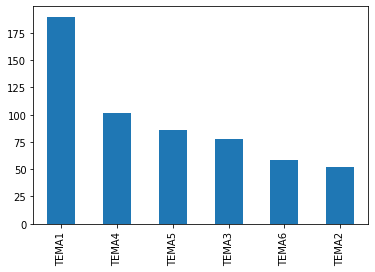

In [ ]:
ax = df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')
plt.show()

The topis are almost balanced, so we are good

finally that we have our models set up, as well as analyzed, we can go ahead to visualizing them.

In [ ]:
!pip install pyLDAvis==2.1.2

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=c4ad6a47cc74f50baf5eccb3e374f6fe50686bf577b9e5fd6007b6330be066d9
  Stored in directory: /root/.cache/pip/wheels/31/8c/a0/24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis
ERROR: Operation cancelled by user


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.7 MB/s eta 0:00:00


**A new error happened!**

In [ ]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
import pyLDAvis.gensim
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.009682  0.008497       1        1  34.372328
3      0.004137  0.002464       2        1  22.617267
2     -0.010050 -0.065758       3        1  13.887592
4      0.003749  0.006577       4        1  13.818474
5     -0.048083  0.032433       5        1   8.085525
1      0.059929  0.015786       6        1   7.218814, topic_info=       Term        Freq       Total Category  logprob  loglift
78    tarde   85.000000   85.000000  Default  30.0000  30.0000
94     agua   97.000000   97.000000  Default  29.0000  29.0000
534    amor   73.000000   73.000000  Default  28.0000  28.0000
1      alma   61.000000   61.000000  Default  27.0000  27.0000
80   tierra  122.000000  122.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
40      mar    3.696544  106.425635   Topic6  -5.6835  -0.7316
369     ana    3.232025   45.687651   Topic6  -5.8177  -0.0202
161   cielo    3.127349   38.467358   Topic6  -5.8507   0.1189
1      alma    3.254756   61.524564   Topic6  -5.8107  -0.3108
96     bajo    3.185466   61.592794   Topic6  -5.8323  -0.3335

[477 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
533       1  0.088764      aba
533       2  0.177527      aba
533       3  0.088764      aba
533       4  0.355055      aba
533       5  0.088764      aba
...     ...       ...      ...
671       5  0.075526      voz
1399      2  0.279268  vueltas
1399      6  0.558535  vueltas
1074      3  0.318845   yertos
1074      4  0.637691   yertos

[1109 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 5, 6, 2])